In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [ ]:
# Load the dataset
url = "https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv"
application_df = pd.read_csv(url)

In [ ]:
# Drop the non-beneficial ID column 'EIN'
application_df = application_df.drop(columns=["EIN"])

In [ ]:
# Determine the number of unique values in each column.
for x in application_df.columns:
    print(x, len(application_df[x].unique()))

In [ ]:
# Look at NAME value counts for binning
countsA = application_df['NAME'].value_counts()
countsA

In [ ]:
# Choose a cutoff value and create a list of names to replace with "Other" using the variable name `names_replace`
names_replace = list(countsA[countsA<5].index)
names_replace

In [ ]:
# Replace in dataframe
for name in names_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Verify that the binning was successful
application_df['NAME'].value_counts()

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
counts = application_df['APPLICATION_TYPE'].value_counts()
counts

In [ ]:
# Choose a cutoff value and create a list of application types to replace with "Other" using the variable name `application_types_to_replace`
application_types_to_replace = list(counts[counts<500].index)
application_types_to_replace

In [ ]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Verify that the binning was successful
application_df['APPLICATION_TYPE'].value_counts()

In [ ]:
# Look at CLASSIFICATION value counts for binning
countsbinning = application_df['CLASSIFICATION'].value_counts()

In [ ]:
# Look at CLASSIFICATION value counts greater than 1
countsclassification = countsbinning[countsbinning>1]
countsclassification

In [ ]:
# Choose a cutoff value and create a list of classifications to replace with "Other" using the variable name `classifications_to_replace`
classifications_to_replace = list (countsbinning[countsbinning<100].index)
classifications_to_replace

In [ ]:
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Verify that the binning was successful
application_df['CLASSIFICATION'].value_counts()

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df,dtype=float)
application_df.head()

In [ ]:
# Split the preprocessed data into features (X) and target (y) arrays
y = application_df['IS_SUCCESSFUL'].values

# Drop 'IS_SUCCESSFUL' column to create features array
X = application_df.drop('IS_SUCCESSFUL', axis=1).values

In [ ]:
# Split the preprocessed data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler on the training data
X_scaler = scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the model - deep neural network, including the number of input features and hidden nodes for each layer
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=7
hidden_nodes_layer2=14
hidden_nodes_layer3=21
nn = tf.keras.models.Sequential()

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

In [ ]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export our model to HDF5 file
from google.colab import files

nn.save('/content/AlphabetSoupCharity_Optimization.h5')
files.download('/content/AlphabetSoupCharity_Optimization.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

268/268 [==============================] - 1s 2ms/step


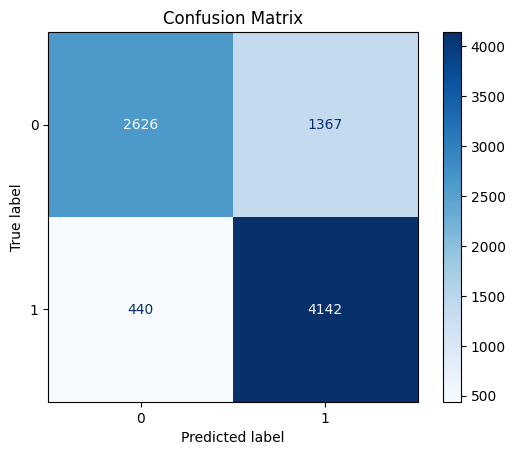

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test data
y_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

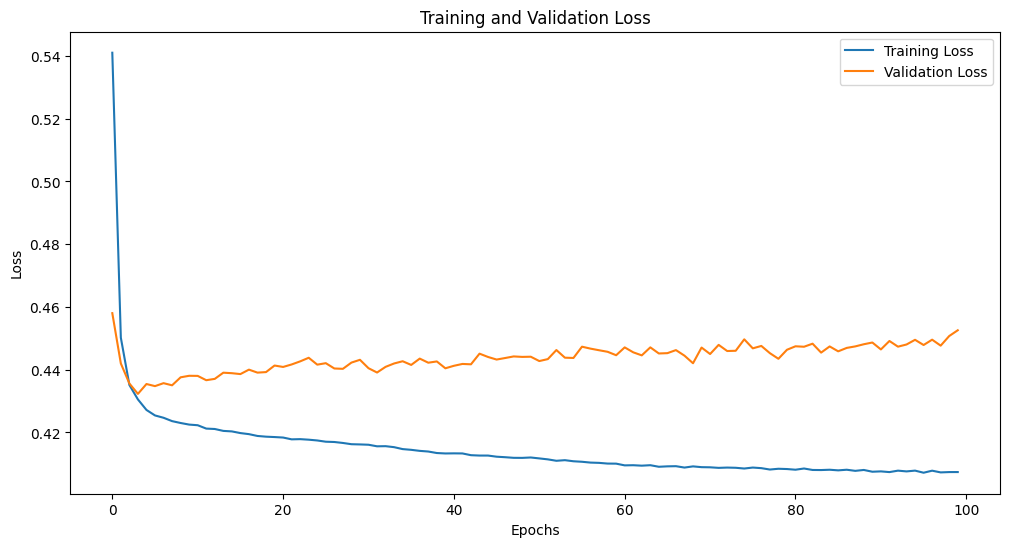

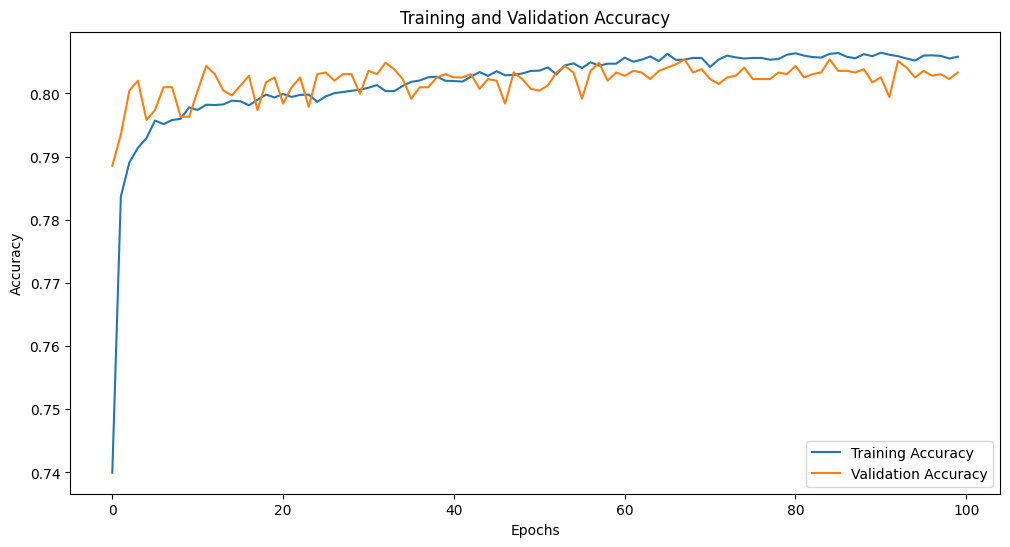

In [ ]:
# Extract the history from the training process
history_dict = fit_model.history

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
